In [1]:
import h5py
import numpy as np
import scipy as scipy
from scipy import optimize
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
import time
import peakutils
import seaborn



%matplotlib inline

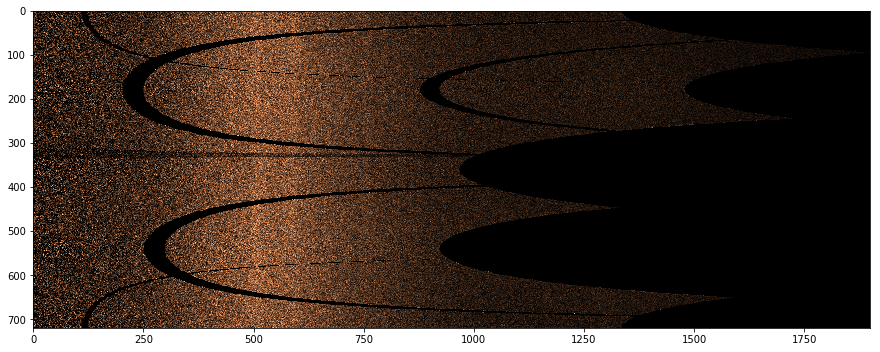

In [9]:
scan = np.load('test_scan.npy')
plt.figure(figsize=(15,10))
plt.imshow(scan[:,100:], cmap = 'copper', clim = (0, 2))

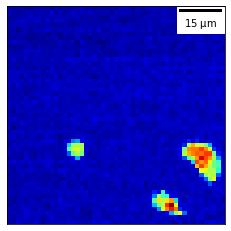

In [29]:

img = plt.imread('powder-dif2.png')
fig = plt.imshow(img)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
scalebar = ScaleBar(0.187*10**(-6)) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)
plt.show()
#fig.savefig("powder-optic.png", format="png")

## Rolling ball testing

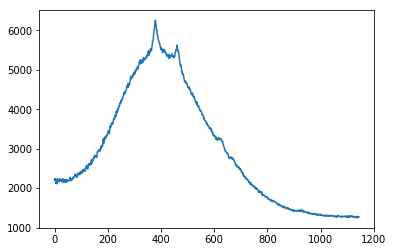

In [73]:
profile = np.load('profile.npy')
plt.plot(profile)

In [74]:
#rolling ball, yeah!

r = 40 #ball radius

t1 = np.zeros(profile.shape[0],dtype=np.float32)
for i in range (t1.shape[0]):
    for j in range(-r,r):
        if ((i+j)>0 and (i+j)<t1.shape[0]):
            
            if(t1[i]<profile[i+j]):
                t1[i]=profile[i+j]

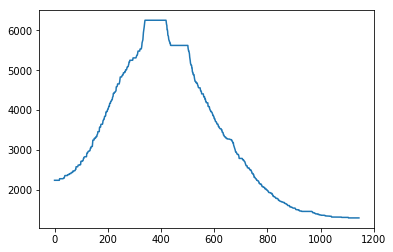

In [75]:
plt.plot(t1)

In [76]:


t2 = np.full(profile.shape[0], 10000,dtype=np.float32)


for i in range (t2.shape[0]):
    for j in range(-r,r):
        if ((i+j)>0 and (i+j)<t2.shape[0]):
            
            if(t2[i]>profile[i+j]):
                t2[i]=profile[i+j]

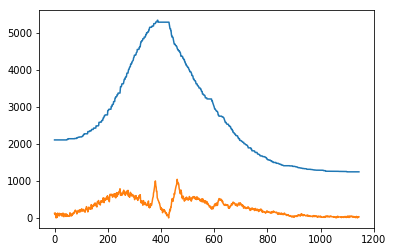

In [77]:
plt.plot(t2)
plt.plot(profile - t2)

In [78]:
t3 = np.zeros(profile.shape[0],dtype=np.float32)
count = np.zeros(profile.shape[0],dtype=np.float32)
back = np.zeros(profile.shape[0],dtype=np.float32)

for i in range(t3.shape[0]): #smooth
    for j in range(-r,r):
        if ((i+j)>0 and (i+j)<t3.shape[0]):
            t3[i]+=t2[i+j] #sum
            count[i]+=1
            
    back[i] = t3[i]/count[i] #average

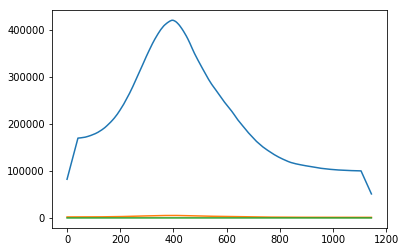

In [79]:
plt.plot(t3)
plt.plot(back)
plt.plot(count)